<a href="https://colab.research.google.com/github/ahsanrazi/LangChain/blob/main/10_Multimodal_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal RAG

In [ ]:
# There are three ways to make the Multimodal RAG System.

# Option 1: Use Multimodal Embeddings (Like CLIP)
# Option 2: Convert Images to Text Summaries First
# Option 3: Store Image Summaries + Link to Images

# Doc Link: https://blog.langchain.dev/semi-structured-multi-modal-rag/

# Simple, powerful idea for RAG: decouple documents, which we want to use for answer synthesis, from a reference, which we want to use for retriever.
# As a simple example, we can create a summary of a verbose document optimized to vector-based similarity search,
# but still pass the full document into the LLM to ensure no context is lost during answer synthesis.


# Unstructured processes PDF files by breaking them into meaningful text sections. Here's how it works in a simple way:

# Removes images → First, it removes all pictures from the PDF to focus only on the text.
# Detects sections using AI → It uses a model called YOLOX to identify important parts of the document, like: Titles (e.g., "Introduction," "Conclusion")
# Tables (by recognizing their position and layout)
# Groups text under titles → Once titles are detected, it collects all the text that belongs to each section.
# Breaks text into chunks → It further divides the text into smaller parts based on user preferences, such as: Minimum chunk size


# Unstructured file parsing and multi-vector retrieval work together to improve RAG for semi-structured data (like PDFs with text and tables).

# Here’s a simple breakdown:
# Problem with basic chunking → Regular chunking methods may split tables incorrectly, making it hard for the LLM to understand them.
# How Unstructured helps → It processes files intelligently, recognizing tables and generating summaries of their contents instead of breaking them randomly.
# How multi-vector retrieval helps → Instead of searching full documents, it retrieves both text chunks and table summaries based on semantic similarity.
# Better retrieval process:
# If a table summary matches the user’s question, the system retrieves it.
# The full/raw table is then sent to the LLM for a more accurate and complete answer.

In [ ]:
# https://github.com/sunnysavita10/Generative-AI-Indepth-Basic-to-Advance/blob/main/MultiModal%20RAG/Extract_Image%2CTable%2CText_from_Document_MultiModal_Summrizer_AAG_App_YT.ipynb

In [ ]:
# https://colab.research.google.com/gist/alejandro-ao/47db0b8b9d00b10a96ab42dd59d90b86/langchain-multimodal.ipynb#scrollTo=4b45fb81-46b1-426e-aa2c-01aed4eac700

# Extract Images, Tables, Text from Documents

In [1]:
!pip install langchain langchain-chroma "unstructured[all-docs]" pillow lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 51.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 5

In [2]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [66.7 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,311 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,653 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubunt

In [3]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (138 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 124926 

In [4]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libimagequant0 libraqm0 python3-olefile tesseract-ocr-osd
Suggested packages:
  python-pil-doc
The following NEW packages will be installed:
  libarchive-dev libimagequant0 libleptonica-dev libraqm0 libtesseract-dev
  python3-olefile python3-pil tesseract-ocr tesseract-ocr-eng
  tesseract-ocr-osd tesseract-ocr-script-latn
0 upgraded, 11 newly installed, 0 to remove and 24 not upgraded.
Need to get 39.9 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:4 http://archive.ubuntu

In [5]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr

  Preparing metadata (setup.py) ... done
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp311-cp311-linux_x86_64.whl size=179084 sha256=5a4ddb0bd726caa91e08b8072a719bedb58b448ad5d5586fe432a209152e9503
  Stored in directory: /root/.cache/pip/wheels/90/83/3c/d2b68d844d169d6015fc2ad8c93207d778829c87e26c6f2206
Successfully built tesseract-ocr


In [ ]:
# from unstructured.partition.pdf import partition_pdf
# raw_pdf_elements=partition_pdf(
#     filename="/content/transformer.pdf",
#     strategy="hi_res",
#     extract_images_in_pdf=True,
#     extract_image_block_types=["Image", "Table"],
#     extract_image_block_to_payload=False,
#     extract_image_block_output_dir="extracted_data"
#   )

In [6]:
from unstructured.partition.pdf import partition_pdf

raw_pdf_elements = partition_pdf(
    filename="/content/cymbal-starlight-2024.pdf",
    strategy="hi_res",
    infer_table_structure=True,
    extract_image_block_to_payload=True,
    extract_image_block_types=["Image", "Table"],
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [8]:
len(raw_pdf_elements)

22

In [7]:
set([str(type(el)) for el in raw_pdf_elements])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [25]:
raw_pdf_elements[19].metadata.orig_elements

In [15]:
elements = raw_pdf_elements[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '9547056b-30e5-4809-9736-d99c0f1d6e91',
 'text': 'bal',
 'metadata': {'coordinates': {'points': ((119.44443502314834,
     133.33332777777778),
    (119.44443502314834, 545.8332705902794),
    (1161.1110582870372, 545.8332705902794),
    (1161.1110582870372, 133.33332777777778)),
   'system': 'PixelSpace',
   'layout_width': 1653,
   'layout_height': 2339},
  'last_modified': '2025-02-11T10:33:54',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGdBBIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx

In [26]:
elements = raw_pdf_elements[19].metadata.orig_elements # 17
chunk_images = [el for el in elements if 'Table' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Table',
 'element_id': '558bc569-b794-417c-b317-80df2c33d911',
 'text': 'Oil change Every 5,000 miles or 6 months Tire rotation Every 5,000 miles or 6 months Air filter replacement Every 10,000 miles or 12 months Cabin air filter replacement Every 15,000 miles or 12 months Brake inspection Every 10,000 miles or 12 months Battery inspection Every 20,000 miles or 24 months Spark plug replacement Every 30,000 miles or 36 months Fuel filter replacement Every 30,000 miles or 36 months Timing belt replacement Every 60,000 miles or 60 months',
 'metadata': {'detection_class_prob': 0.8322274088859558,
  'coordinates': {'points': ((134.41192626953125, 929.5225219726562),
    (134.41192626953125, 1550.497314453125),
    (971.9646606445312, 1550.497314453125),
    (971.9646606445312, 929.5225219726562)),
   'system': 'PixelSpace',
   'layout_width': 1653,
   'layout_height': 2339},
  'last_modified': '2025-02-11T10:33:54',
  'text_as_html': '<table><thead><tr><th>Oil change</th><th>Ever

In [28]:
# Create a dictionary to store counts of each type
category_counts = {}

for element in raw_pdf_elements:
    category = str(type(element))
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

# Unique_categories will have unique elements
unique_categories = set(category_counts.keys())
category_counts

{"<class 'unstructured.documents.elements.CompositeElement'>": 22}

In [33]:
texts = []

for chunk in raw_pdf_elements:
    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [34]:
texts

In [59]:
# Get the images from the CompositeElement objects
def get_tables(chunks):
    tables = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Table" in str(type(el)):
                    tables.append(el.text)
    return tables

tables = get_tables(raw_pdf_elements)

In [60]:
tables

['Power button Turns the audio system on and off Volume knob Adjusts the volume Tuning knob Tunes the radio Source button Selects the audio source (e.g., AM/FM radio, CD player, MP3 player, Bluetooth) Track skip buttons Skips to the next or previous track',
 'Oil change Every 5,000 miles or 6 months Tire rotation Every 5,000 miles or 6 months Air filter replacement Every 10,000 miles or 12 months Cabin air filter replacement Every 15,000 miles or 12 months Brake inspection Every 10,000 miles or 12 months Battery inspection Every 20,000 miles or 24 months Spark plug replacement Every 30,000 miles or 36 months Fuel filter replacement Every 30,000 miles or 36 months Timing belt replacement Every 60,000 miles or 60 months']

In [56]:
# Get the images from the CompositeElement objects
def get_tables(chunks):
    tables = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Table" in str(type(el)):
                    tables.append(el.metadata.image_base64)
    return tables

table_images = get_tables(raw_pdf_elements)

In [57]:
table_images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGABUgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDvfjD4IufGvhBY9OVW1Kyl8+BCceaMEMmTwCRgj3UDvmvMvCXxwvPB2iReHfEeg3Mk9gnkxNu8qQKOFR0YcYHGfQDjufo+o3ghldXkiR2U5UsoJB9qAPB/AKeL/iF8Rh4v1L7XY6DC+9LfznWJyq4REGRuwcMxxgkH1xWbrH

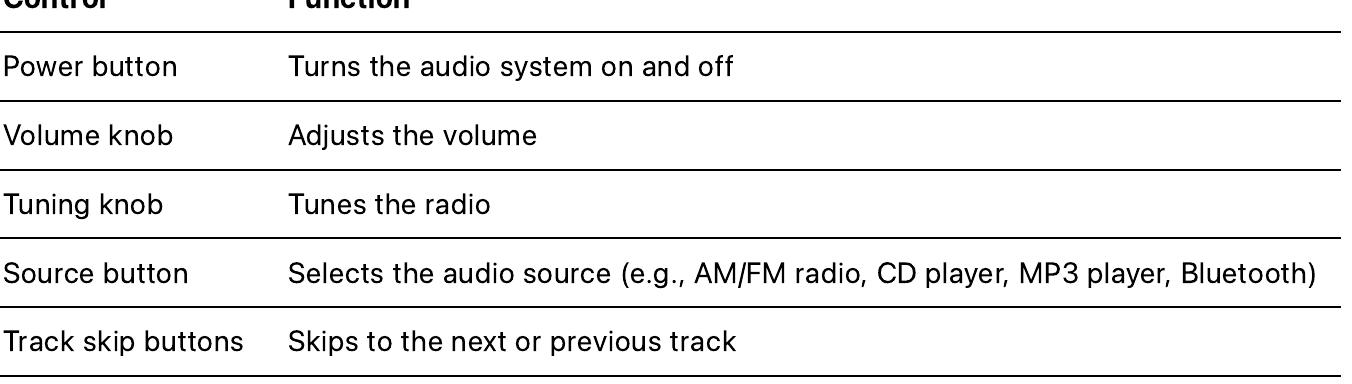

In [58]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(table_images[0])

In [36]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(raw_pdf_elements)

In [41]:
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGdBBIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5/ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA

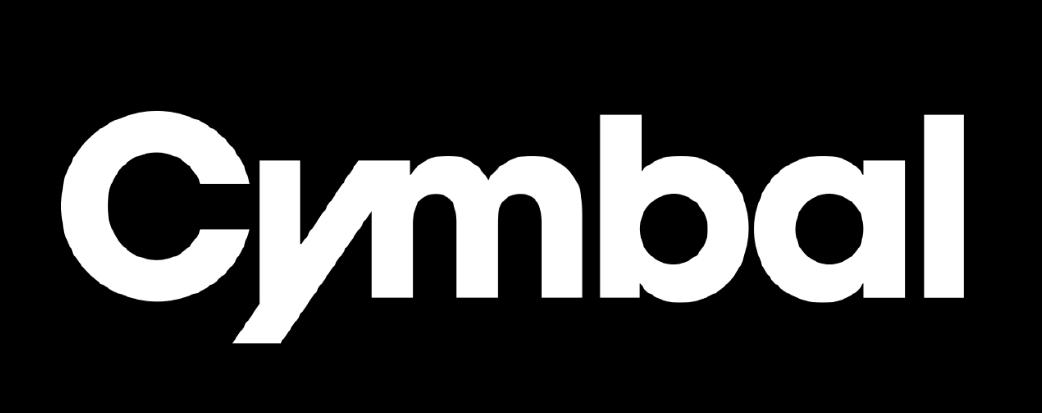

In [37]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

In [44]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.4 MB/s eta 0:00:00


In [45]:
from google.colab import userdata
groq_api = userdata.get('GROQ_API_KEY').strip()

In [49]:
from langchain_groq import ChatGroq

groq_model = ChatGroq(model="llama-3.2-90b-vision-preview", api_key=groq_api)

In [46]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY').strip()

In [47]:
!pip install -qU langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.6 MB/s eta 0:00:00


In [53]:
from langchain_google_genai import ChatGoogleGenerativeAI

gemini_model = ChatGoogleGenerativeAI(model = "gemini-2.0-flash-exp", api_key = gemini_api_key)

In [54]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key = gemini_api_key)

In [51]:
!pip install -qU langchain-pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.5 MB/s eta 0:00:00


In [52]:
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone

index_name = "langchain"
namespace = "Multivector"

pc = Pinecone(api_key= userdata.get('PINECONE_API'))
index = pc.Index(index_name)

vector_store = PineconeVectorStore(embedding=embeddings, index=index, namespace=namespace)

In [61]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [62]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables.
Give a concise summary of the table.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
summarize_chain = {"element": lambda x: x} | prompt | gemini_model | StrOutputParser()

In [65]:
table_summaries = summarize_chain.batch(tables, {"max_concurrency": 2})

In [66]:
table_summaries

['The table describes the functions of car audio system controls: the power button turns the system on/off, the volume knob adjusts volume, the tuning knob tunes the radio, the source button selects the audio source, and the track skip buttons change tracks.',
 'The table outlines a vehicle maintenance schedule, including oil changes and tire rotations every 5,000 miles/6 months, air filter and brake inspections every 10,000 miles/12 months, cabin air filter replacement every 15,000 miles/12 months, battery inspection every 20,000 miles/24 months, spark plug and fuel filter replacement every 30,000 miles/36 months, and timing belt replacement every 60,000 miles/60 months.']

In [74]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing text.
Give a concise summary of the text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)


text_summarize_chain = {"element": lambda x: x} | prompt | gemini_model | StrOutputParser()

In [75]:
# Summarize text
import time
text_summaries = []

for text in texts:
    s = text_summarize_chain.invoke(text)
    text_summaries.append(s)
    time.sleep(10)


In [77]:
len(text_summaries)

22

In [82]:
prompt_template = """Describe the image in detail. For context,
                  the image is part of a Cymbal Starlight 2024: Owner's Manual"""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | gemini_model | StrOutputParser()


image_summaries = chain.batch(table_images)

In [83]:
image_summaries

['The image is a table from the Cymbal Starlight 2024 Owner\'s Manual that lists common audio system controls and their respective functions. The table is divided into two columns, "Control" and "Function," and each row describes a different control. The controls listed are the Power button, Volume knob, Tuning knob, Source button, and Track skip buttons. The corresponding functions are: "Turns the audio system on and off," "Adjusts the volume," "Tunes the radio," "Selects the audio source (e.g., AM/FM radio, CD player, MP3 player, Bluetooth)," and "Skips to the next or previous track." Each row is separated by a horizontal line.',
 'The image is a table outlining the maintenance schedule for a Cymbal Starlight 2024, as found in the owner\'s manual. The table is presented in a simple, clear format with two columns. The left column lists the type of maintenance required, such as "Oil change," "Tire rotation," "Air filter replacement," "Cabin air filter replacement," "Brake inspection," 

In [107]:
import uuid
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.retrievers.multi_vector import MultiVectorRetriever


# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vector_store,
    docstore=store,
    id_key=id_key,
)

In [108]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

In [109]:
# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

In [110]:
# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in table_images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, table_images)))

In [111]:
# Retrieve
docs = retriever.invoke(
    "Tell me about Vehicle Stability Control (VSC)"
)

In [112]:
for doc in docs:
    print(str(doc))

manual.md

manual.md

bal

Cymbal Starlight 2024: Owner's Manual

Chapter 1: Safety

Introduction

Your safety and the safety of others is paramount. This chapter provides important information to help you

operate your Cymbal Starlight 2024 safely and responsibly. Please read and understand this information thoroughly before operating your vehicle.

Seat Belts

All occupants must wear seat belts at all times.

e All occupants must wear seat belts at all times.

Adjust the seat belt to fit snugly around your hips and across your chest.

Never wear a seat belt under your arm or behind your back.

Replace any seat belt that has been damaged or frayed.

Airbags

Airbags are supplemental restraints and work in conjunction with seat belts to provide additional

protection in the event of a collision.

Do not place objects on or near the airbag deployment areas (e.g., dashboard, steering wheel, seat

backs).

Children under the age of 12 should never ride in the front seat.

If the airbag wa

In [113]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | gemini_model
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | gemini_model
        | StrOutputParser()
    )
)

In [114]:
response = chain_with_sources.invoke(
    "How many miles I need to change the oil of 2024 Cymbal Starlight"
)

print("Response:", response['response'])

Response: According to the maintenance schedule, you need to change the oil of 2024 Cymbal Starlight every 5,000 miles.


In [115]:
response = chain_with_sources.invoke(
    "tell me about the car care tips of 2024 Cymbal Starlight"
)

print("Response:", response['response'])

Response: To keep your Cymbal Starlight 2024 in good condition, you can:

*   Wash your vehicle regularly to remove dirt and grime.
*   Wax your vehicle twice a year to protect the paint.
*   Check the tire pressure regularly and adjust it as needed.
*   Inspect the brakes regularly for wear and tear.
*   Keep the interior of your vehicle clean and free of debris.


Response: According to the maintenance schedule, you need to change the oil of 2024 Cymbal Starlight every 5,000 miles or 6 months.


Context:
Professional Maintenance

It is important to have your Cymbal Starlight 2024 serviced by a qualified technician at least once a year. A

qualified technician can perform a thorough inspection of your vehicle and identify any potential problems.

Car Care Tips

In addition to following the maintenance schedule, there are a number of things you can do to keep your

Cymbal Starlight 2024 in good condition. These include:

20 / 22

2024-03-23

manual.md

manual.md

Wash your vehicle regularly to remove dirt and grime.

Wax your vehicle twice a year to protect the paint.

Check the tire pressure regularly and adjust it as needed.

Inspect the brakes regularly for wear and tear.

Keep the interior of your vehicle clean and free of debris.

By following these tips, you can help to keep your Cymbal Starlight 2024 in top condition for many years to come.

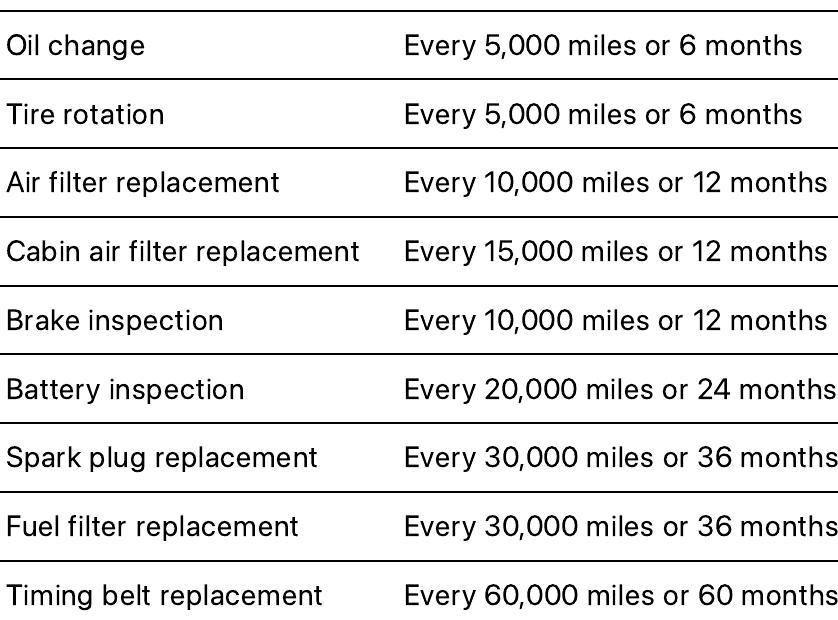

In [116]:
response = chain_with_sources.invoke(
    "How many miles I need to change the oil of 2024 Cymbal Starlight"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)